# Assignment 11: Model Selection, Regularized regression and final practice
## Learning goals 
This homework includes some repeated task and variations on model fitting, and model comparision, which should prepare you optimally for the final. 
The homework also introduces z-standardization and regularized (L2) regression. 
Try to solve the task in the homework independently, and prepare a cheat-sheet and a file with useful functions, such that you can complete this homework in 3 hrs or less. 

## Data set 
The file kaiser.csv contains a subset of data from the Child Health and Development Studies, which investigate a range of topics. One study considered all pregnancies between 1960 and 1967 among women in the Kaiser Foundation Health Plan in the San Francisco East Bay area. Here, we look at the predictor of birth weight of babies, measured in pounds, as well as the occurence of complications in the first 3 month. 

The data frame stored in babies.csv contains the variables: 
- gestation:    Gestation period (length of pregnancy) [days]
- parity:       1: child the first born 0: Child has older siblings 
- age:          Age of the mom at time of birth
- height:       Height of the baby [cm].
- weight:       Weight of the baby [pounds].  
- smoke:        Is the mom a smoker / non-smoker? 
- hospital:     Which hospital was the birth at? Oakland, SanFrancisco, WalnutCreek, SanJose, and Richmond.
- complication: Was there a complication within the first 3 month of pregnancy (0: No 1:Yes) 

## Preliminaries
Set up the environment by importing pandas, seaborn, numpy, scipy.optimize and matplotlib. 
Then add your multiple regression functions (multRegPredict,multRegLossRSS, multRegFit) from the last homeworks. 

To make it easier - we have done these things already! 

In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import scipy.optimize as so
import seaborn as sns
import pandas as pd 
import numpy as np

In [2]:
def multRegPredict(b,D,xname):
    """Prediction function for multipel regression 

    Args:
        b (nd.array): Array of regression coefficients - first is intercept 
        D (pd.DataFrame): Pandas data frame with explanatory variables
        xname (list): List of strings with names of explanatory variables  

    Returns:
        yp (nd.array): Predicted y - values 
    """
    yp=np.ones(len(D.index))*b[0]        # Intercept 
    for i in range(len(xname)):          
        yp=yp+D[xname[i]]*b[i+1]         # Add each regression value 
    return yp 

def multRegLossRSS(b,D,y,xname):
    """Loss function for OLS multiple regression 

    Args:
        b (nd.array): Array of regression coefficients - first is intercept 
        D (pd.DataFrame): Pandas data frame with explanatory variables
        y (ndarray): Dependent variable 
        xname (list): List of strings with names of explanatory variables  

    Returns:
        rss: Current loss
        grad: gradient of loss function in respect to parameters  
    """
    predY = multRegPredict(b,D,xname)
    res = y-predY
    rss = sum(res**2)
    grad=np.zeros(len(b))
    grad[0]=-2*np.sum(res)
    for i in range(len(xname)):
        grad[i+1]=-2*np.sum(D[xname[i]]*res)
    return (rss,grad)

def multRegFit(D,y,xname=[],figure=0,b0=[]):
    """Fits a multiple regression loss function 

    Args:
        D (pd.DataFrame): Pandas data frame with explanatory variables
        y (ndarray): Dependent variable 
        xname (list): List of strings with names of explanatory variables  
        figure (int): Plot figure? Defaults to 0.
        b0 (np.ndarray). Initial guess for the parameter vector

    Returns:
        R2: Fitted R2 value 
        b: Fitted 
    """
    k=len(xname)+1
    if (len(b0)!=k):
        b0=np.zeros((k,))
    RES = so.minimize(multRegLossRSS,b0,args=(D,y,xname),jac=True)
    b=RES.x # Results
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = multRegLossRSS(b,D,y,xname)
    R2 = 1-RSS/TSS 
    if (k==2 and figure==1):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(D[xname[0]],y)
        xRange=[min(D[xname[0]]),max(D[xname[0]])]
        xp=np.arange(xRange[0],xRange[1],(xRange[1]-xRange[0])/50)
        yp=b[0]+b[1]*xp
        ax.plot(xp,yp,'r-')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    return (R2,b)

In [3]:
df = pd.read_csv("kaiser.csv")
df

,age,smoke,hospital,gestation,parity,weight,complication
0,28.945386,smoker,WalnutCreek,259.984898,1,6.154760,1
1,37.369146,non-smoker,SanFrancisco,279.583370,0,6.746684,1
2,34.932707,non-smoker,Richmond,287.107287,0,9.150785,0
3,34.791652,non-smoker,Oakland,270.374191,0,7.023815,0
4,41.950210,non-smoker,SanJose,245.130005,0,5.861300,0
...,...,...,...,...,...,...,...
95,17.535064,smoker,Richmond,264.054332,1,6.816188,1
96,36.919301,non-smoker,Richmond,249.503172,0,6.355362,0
97,29.618348,smoker,Richmond,264.715985,1,6.102431,0
98,22.833492,non-smoker,SanJose,288.755560,0,6.926468,1


## Task 1: Multiple regression with discrete variables ( / 30 pts)
### Question 1.1 ( / 10pt)
Create a dummy variable for Smoker / Non-smoker. Set the value for “Smoker” to 1 and for “Non-smoker” to 0. Estimate a regression model with the dummy variable as a regressor *and birth weight as the response variable.* 

Report the value of the intercept and slope. What does the intercept and slope value indicate? 


In [4]:
dSmoke = df['smoke'] == 'smoker'
dSmoke = np.double(dSmoke)
df['dSmoke']  = dSmoke
df

,age,smoke,hospital,gestation,parity,weight,complication,dSmoke
0,28.945386,smoker,WalnutCreek,259.984898,1,6.154760,1,1.0
1,37.369146,non-smoker,SanFrancisco,279.583370,0,6.746684,1,0.0
2,34.932707,non-smoker,Richmond,287.107287,0,9.150785,0,0.0
3,34.791652,non-smoker,Oakland,270.374191,0,7.023815,0,0.0
4,41.950210,non-smoker,SanJose,245.130005,0,5.861300,0,0.0
...,...,...,...,...,...,...,...,...
95,17.535064,smoker,Richmond,264.054332,1,6.816188,1,1.0
96,36.919301,non-smoker,Richmond,249.503172,0,6.355362,0,0.0
97,29.618348,smoker,Richmond,264.715985,1,6.102431,0,1.0
98,22.833492,non-smoker,SanJose,288.755560,0,6.926468,1,0.0


The R2 is 0.17730888763721242
The b values are [ 7.68827818 -1.20831337]


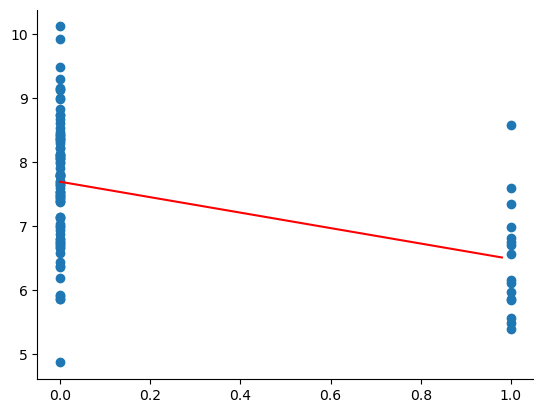

In [5]:
R2, b = multRegFit(df,y = df["weight"], xname=["dSmoke"],figure=1,b0=[])
print("The R2 is", R2)
print("The b values are", b)

Figure 1. Scatter plot of smoker status against birth weight. 0 is for non-smoker and 1 is for smoker. 

The intercept represents the mean birthweight of non-smoke and the slope is the difference between non-smokers and smokes. The trend is that birthweight for babies born to smokers is lower than non-smokers. This is shown through the negative slope (decreasing). 

### Question 1.2 ( / 8pt)
Make a boxplot of hospital on the x-axis and birthweight on the y-axis (see HW2 for an example). Which hospital has the lowest overall birth weight?  

Text(0.5, 0, 'Hospital')

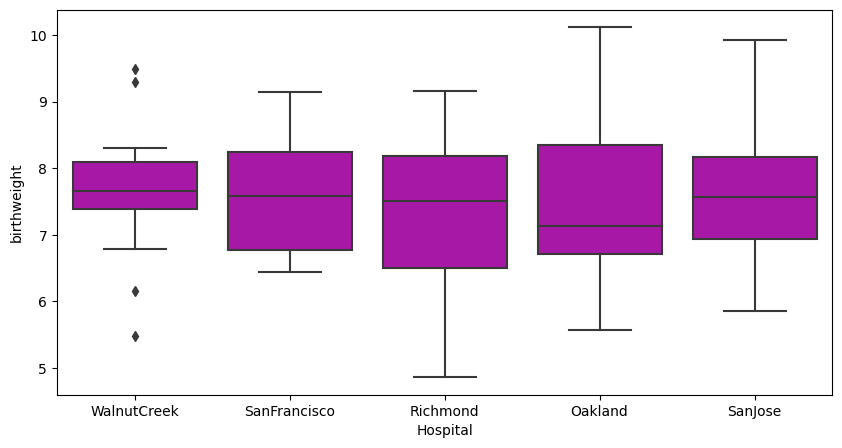

In [6]:
fig, axes = plt.subplots(figsize = (10,5))
sns.boxplot(data = df, y = "weight", x = "hospital", ax = axes, color = "m")
axes.set_ylabel("birthweight")
axes.set_xlabel("Hospital")

Figure 2. Boxplot of birthweight by hospital. 

The hospital that has the lowest average birthweight is Oakland, however, Richmonds IQR extends the lowest. 

### Question 1.3  ( / 12pt)
Create a set of 4 dummy variables that together code the hospital. Set Walnut Creek to be your comparison group. Run a multiple regression model with the 4 dummy variables as explanatory variables. Report the interecept and slope values. What do the intercept and slope values mean? 

In [7]:
# dWC = df['hospital'] == 'WalnutCreek'
# dWC = np.double(dWC)
# df['dWC']  = dWC

dSF = df['hospital'] == 'SanFrancisco'
dSF = np.double(dSF)
df['dSF']  = dSF

dRich = df['hospital'] == 'Richmond'
dRich = np.double(dRich)
df['dRich']  = dRich

dOak = df['hospital'] == 'Oakland'
dOak = np.double(dOak)
df['dOak']  = dOak

dSJ = df['hospital'] == 'SanJose'
dSJ = np.double(dSJ)
df['dSJ']  = dSJ

R2, b = multRegFit(df,y = df["weight"], xname=["dSF", "dRich", "dOak", "dSJ"],figure=1,b0=[])
print("The R2 is", R2)
print("The b values are", b)

The R2 is 0.017073994697972106
The b values are [ 7.64577979  0.02134188 -0.33250686 -0.2043533  -0.10127978]


The intercept is representative of the mean of Walnut Creek as it is playing the role of the comparison group. The slopes are the differences between each hospital. 

## Task 2: Model selection for multiple regression  ( / 35 pts)
### Question 2.1 ( / 20 pts)
Write a version of the crossvalidation function that does K-fold crossvalidation and works specifically with multRegFit as the fitting function. 

KfoldCVmultReg(D,y,xname,K=20,fitfcn=multRegFit,param={},predictfcn=multRegPredict):
- D: Data Frame with explanatory variables  
- y: response variable 
- xname: List of explanatory variables
- K: Number of crossvalidation folds

For dividing the data up in K pieces, you can use the following trick to assign a partition index to each of the data-points:
```
#N = number of data points 
#K = number of test sets (folds)
ind = np.arange(N)
ind = np.floor(ind/N*K)
```


The code should compute and return the crossvalidated R2 and the fitted R2. 
It should use the entries in the Dictionary to pass them to the function using `fitfcn(D,y,xname,**param)`
Run 20-fold crossvalidation on the multiple regression model, with birth weight as the response variable and 

- age of the mother 
- smoker (dummy coded) 
- birth occurred in Oakland? 
- gestation 

as explanatory variables. 
Report R2cv and R2. 

In [8]:
def KfoldCVmultReg(D, y, xname, K = 20, fitfcn = multRegFit, param={}, predfcn = multRegPredict):

    # first create an array that represent the index 
    ind = np.arange(len(df.index))
    
    yp_cv = np.zeros(len(df.index))

    # use np.array_split to generate indices for folds
    folds = np.array_split(ind, K)
    
    N = len(folds)
    
    r,b0 = fitfcn(D,y,xname,**param)
    
    for f in np.arange(N): 
        folds_cp = folds.copy() # creating a copy of the folds array
        test_ind = folds[f] # get the indices for test set
        df_test  = df.loc[test_ind] # set one fold aside for testing


        del folds_cp[f]        # delete the test set indices
        train_ind = np.concatenate(folds_cp, axis = 0) # concatenate all the remaining indices into 1 array
        df_train  = df.loc[train_ind]
        ytrain = y.loc[train_ind]
        
        r,b = fitfcn(df_train,ytrain,xname,**param) # multRegFit(D,y,xname=[],figure=0,b0=[])
        yp_cv[test_ind] = predfcn(b, df_test, xname)# **param) # multRegPredict(b,D,xname)
        

    # TSS
    TSS = sum((y - y.mean())**2)

    # cross validated RSS
    RSScv = sum((y - yp_cv)**2)

    # cross validated R2
    R2cv = 1-RSScv/TSS

    # fit and predict
    yp = predfcn(b0, D, xname) # **param)

    # 
    TSS = sum((y-y.mean())**2)
    RSS = sum((y-yp)**2)
    R2  = 1-RSS/TSS
    
    return R2cv, R2

In [9]:
R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["age", "dSmoke", "dOak", "gestation"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("The cross-validated R2 is", R2cv)
print("The R2 is", R2)

The cross-validated R2 is 0.2789972631727561
The R2 is 0.3560741562766846


### Question 2.2 ( / 15 pts)
Using the R2cv from the 20-fold crossvalidation, determine the best predictive model for birthweight using the following candidate variables 

- age of mom
- smoker (dummy coded) 
- gestation 
- parity 

Start with the R2cv for the full model (Question 2.1)and use backwards step-wise regression to find the best model (the model that increases R2cv the most). Show all steps of your selection procedure. Report the formula of your best model. 

In [10]:
R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["age", "dSmoke", "dOak", "gestation"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("The cross-validated R2 is", R2cv)

R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["dSmoke", "dOak", "gestation"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("\nNO AGE: The cross-validated R2 is", R2cv)

R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["age", "dOak", "gestation"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("NO SMOKE: The cross-validated R2 is", R2cv)

R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["age", "dSmoke", "gestation"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("NO OAK: The cross-validated R2 is", R2cv)

R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["age", "dSmoke", "dOak"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("NO GESTATION: The cross-validated R2 is", R2cv)

print("\nContinuing with no Oak...")

R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["dSmoke", "gestation"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("NO AGE: The cross-validated R2 is", R2cv)

R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["age", "gestation"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("NO SMOKE: The cross-validated R2 is", R2cv)

R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["age", "dSmoke",], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("NO GESTATION: The cross-validated R2 is", R2cv)

print("\nContinuing with no Oak and no age...")

R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["gestation"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("NO SMOKE: The cross-validated R2 is", R2cv)

R2cv, R2 = KfoldCVmultReg(df, y = df["weight"], xname = ["dSmoke"], K = 20, fitfcn = multRegFit, param = {}, predfcn = multRegPredict)
print("NO GESTATION: The cross-validated R2 is", R2cv)

print("\nThe model no longer improves. The best model contains information on smoke and gestation.")

R2, b = multRegFit(df,y = df["weight"], xname=["dSmoke", "gestation"],figure=1,b0=[])
print("The formula contains the coefficients", b)

The cross-validated R2 is 0.2789972631727561

NO AGE: The cross-validated R2 is 0.2873106969712439
NO SMOKE: The cross-validated R2 is 0.1467521993404235
NO OAK: The cross-validated R2 is 0.2936324987336909
NO GESTATION: The cross-validated R2 is 0.11845001052539939

Continuing with no Oak...
NO AGE: The cross-validated R2 is 0.30136911537002453
NO SMOKE: The cross-validated R2 is 0.17090307589581877
NO GESTATION: The cross-validated R2 is 0.13457032967955462

Continuing with no Oak and no age...
NO SMOKE: The cross-validated R2 is 0.18436965020621765
NO GESTATION: The cross-validated R2 is 0.14931498558437195

The model no longer improves. The best model contains information on smoke and gestation.
The formula contains the coefficients [-0.96184215 -1.01438409  0.03178096]


## Task 3: Implement regularilzed regression to build a better predictive model (/35pts)
In this task you will implement regularized regression to try to build a better predictive model for the birthweight of data. 
Like in Task 2, we will consider the following explanatory variables:

- age of the mother 
- smoker (dummy coded) 
- birth occurred in Oakland? 
- gestation 

### Question 3.1: Z-standardize the regressors (/8pts)
Write a function `zstandardize`, which takes as an input a pandas series or ndarray 
and returns a z-standardized version of the data 

Use the function to z-standardize the columns age,gestation,parity, and smokeDummy. 

Create new columns in the data frame called ageZ,gestationZ,parityZ, and smokeDummyZ.

Check that the mean of the new variables in very close to and the std very close to 1.  

In [11]:
def zstandardize(inp): # takes all b values 
    inpMean = inp.mean()
    inpSD = inp.std()
    z = np.zeros(len(inp))
    z = (inp - inpMean) / inpSD
    
     #z = inp - mean / SD
    
    return z

In [12]:
zAge = zstandardize(df["age"])
print("Age... Mean:", zAge.mean(), "\t\tSD:", zAge.std())
df['zAge']  = zAge

zDSmoke = zstandardize(df["dSmoke"])
print("Smoke... Mean:", zDSmoke.mean(), "\t\tSD:", zDSmoke.std())
df['zDSmoke']  = zDSmoke

zGestation = zstandardize(df["gestation"])
print("Gestation... Mean:", zGestation.mean(), "\tSD:", zGestation.std())
df['zGestation']  = zGestation

zParity = zstandardize(df["parity"])
print("Parity... Mean:", zParity.mean(), "\tSD:", zParity.std())
df['zParity']  = zParity

df


Age... Mean: -1.7930101847696278e-16 		SD: 0.9999999999999999
Smoke... Mean: 6.661338147750939e-18 		SD: 0.9999999999999987
Gestation... Mean: -2.369215934550084e-15 	SD: 1.0
Parity... Mean: -6.439293542825907e-17 	SD: 0.9999999999999997


,age,smoke,hospital,gestation,parity,weight,complication,dSmoke,dSF,dRich,dOak,dSJ,zAge,zDSmoke,zGestation,zParity
0,28.945386,smoker,WalnutCreek,259.984898,1,6.154760,1,1.0,0.0,0.0,0.0,0.0,-0.057013,2.279803,-0.823657,1.484435
1,37.369146,non-smoker,SanFrancisco,279.583370,0,6.746684,1,0.0,1.0,0.0,0.0,0.0,1.094299,-0.434248,0.615303,-0.666920
2,34.932707,non-smoker,Richmond,287.107287,0,9.150785,0,0.0,0.0,1.0,0.0,0.0,0.761300,-0.434248,1.167725,-0.666920
3,34.791652,non-smoker,Oakland,270.374191,0,7.023815,0,0.0,0.0,0.0,1.0,0.0,0.742021,-0.434248,-0.060854,-0.666920
4,41.950210,non-smoker,SanJose,245.130005,0,5.861300,0,0.0,0.0,0.0,0.0,1.0,1.720412,-0.434248,-1.914335,-0.666920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17.535064,smoker,Richmond,264.054332,1,6.816188,1,1.0,0.0,1.0,0.0,0.0,-1.616510,2.279803,-0.524871,1.484435
96,36.919301,non-smoker,Richmond,249.503172,0,6.355362,0,0.0,0.0,1.0,0.0,0.0,1.032816,-0.434248,-1.593248,-0.666920
97,29.618348,smoker,Richmond,264.715985,1,6.102431,0,1.0,0.0,1.0,0.0,0.0,0.034964,2.279803,-0.476291,1.484435
98,22.833492,non-smoker,SanJose,288.755560,0,6.926468,1,0.0,0.0,0.0,0.0,1.0,-0.892351,-0.434248,1.288745,-0.666920


### Question 3.2 Implement Ridge regression (L2 regularized regression) (/17pts)

To implement ridge regression you need to modify two functions, the most important being the loss function. 
Make a copy of the function `multRegLossRSS` from assigment 10. 
Rename it to `ridgeLoss`. Give the function an additional input parameter, namely alpha. Give this a default value of 1.0. 

Change the loss and the gradient to take into account the regularization. 

**Note that we are not regularizing the intercept regressor (b0)**

Overall the function should take the following input arguments:

    Args:
        b (nd.array): Array of regression coefficients - first is intercept 
        D (pd.DataFrame): Pandas data frame with explanatory variables
        y (ndarray): Dependent variable 
        xname (list): List of strings with names of explanatory variables
        alpha (float): Regularization parameter 

    Returns:
        loss: Current loss
        grad: gradient of loss function in respect to parameters  

Then make a copy of `multRegFit` from the last homework and rename it to `ridgeFit`. 
Again, you need to add an additional input parameter (alpha) to the function. 
Alpha needs to be passed to your loss function (`ridgeLoss`) when you call so.minimize: 

`so.minimize(ridgeLoss,b0,args=(D,y,xname,alpha),jac=True)`

You need to take care when you calculate R2 of the fit - Since ridgeLoss does not return the 
residual-sum-of-squares, you need to use the appropriate function to calculate the RSS.

To test your function:
* Use it to fit a model that explains weight with the explanatory variables `['ageZ','smokeDummyZ','gestationZ','parityZ']`. Note: use the zstandardized version of the variables.  
* Do the fit setting `alpha=0` and `alpha=8`, and report both R2 and the regression coefficients (b)
* Compare the R2 between the two settings of alpha. Also compare to the one found for normal multiple regression (Question 2.1). What do you see and why?
* Compare the regression weights (b) between the two settings of alpha. which regression weights changed and why? 


In [13]:
def ridgeLoss(b,D,y,xname, a = 1):
    
    predY = multRegPredict(b,D,xname)
    res = y-predY
    rss = sum(res**2)
    grad=np.zeros(len(b))
    grad[0]=-2*np.sum(res)
    
    loss = rss + a*(np.sum(b[1:]**2))
    
    for i in range(len(xname)):
        grad[i+1]=-2*np.sum(D[xname[i]]*res) + (2 * a * b[i+1])
        
    return (loss,grad)

def ridgeFit(D,y,xname=[], a = 1, figure=0,b0=[]):
    
    k=len(xname)+1
    if (len(b0)!=k):
        b0=np.zeros((k,))
    RES = so.minimize(ridgeLoss,b0,args=(D,y,xname,a),jac=True)
    b=RES.x # Results
    res = y-np.mean(y)
    TSS = sum(res**2)
    
    predY = multRegPredict(b,D,xname)
    res = y-predY
    RSS = sum(res**2)
    
    #RSS,deriv = multRegLossRSS(b,D,y,xname)
    R2 = 1-RSS/TSS 
    if (k==2 and figure==1):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1)
        ax.scatter(D[xname[0]],y)
        xRange=[min(D[xname[0]]),max(D[xname[0]])]
        xp=np.arange(xRange[0],xRange[1],(xRange[1]-xRange[0])/50)
        yp=b[0]+b[1]*xp
        ax.plot(xp,yp,'r-')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    return (R2,b)

In [14]:
R2, b = ridgeFit(df,y = df["weight"],xname= ["zAge", "zDSmoke", "zGestation", "zParity"],figure=0,b0=[], a = 0)
print("With a = 0 R2 is", R2, "and b is", b)

R2, b = ridgeFit(df,y = df["weight"],xname= ["zAge", "zDSmoke", "zGestation", "zParity"],figure=0,b0=[], a = 8)
print("With a = 8 R2 is", R2, "and b is", b)

With a = 0 R2 is 0.3503171176870481 and b is [ 7.49494802e+00 -1.04180250e-01 -3.82511915e-01  4.33892437e-01
  4.17899298e-03]
With a = 8 R2 is 0.3487574657496001 and b is [ 7.49494804e+00 -9.43223955e-02 -3.57549042e-01  4.04957781e-01
  3.18959013e-03]


Written:
2.1 refresher:
["age", "dSmoke", "dOak", "gestation"]
The R2 is 0.3560741562766846


The R2 in 2.1 and 3.2 with a = 0 are very similar despite using different variables. This is likely due to one of the variables being accounted for already by another. The difference in R2 is closer between the 2 a values than I expected. There is very minimal difference despite some coefficients going through larger changes. All regression weights changed to some extent. I noticed that the variables that make up the best model from 2.2 experience less change on their b values. Larger coefficients are penalized more, changing the estimated influence.


### Question 3.3: Crossvalidate Ridge regression (10pts)
Copy your function `KfoldCVmultReg` from Question 2.1, rename it to `KfoldCVridge`, and modify it to work with Ridge regression. 
That means it needs to take an additional input parameter `alpha` that it passes on to the fitting function. 

To calculate the R2 and R2cv for the model of `weight` using the explanatory variables `['ageZ','smokeDummyZ','gestationZ','parityZ']`. Like in question 3.2, use the standardized versions of the variables and try both the setting `alpha=0` and `alpha=8`. 

How to the R2 and R2cv values compare between the two settings of alpha? Do you get better predictive performance than the reduced model that you found using feature selection (Question 2.2)?


*Note: If you want, play a bit with the regularization parameter to see if you can find a better setting. What happens when you make `alpha` very large (i.e. 1000)? (this is optional, but educational)*

In [15]:
def KfoldCVridge(D, y, xname, K = 20, fitfcn = ridgeFit, param={}, predfcn = multRegPredict, a = 1):

    # first create an array that represent the index 
    ind = np.arange(len(df.index))
    
    yp_cv = np.zeros(len(df.index))

    # use np.array_split to generate indices for folds
    folds = np.array_split(ind, K)
    
    N = len(folds)
    
    r,b0 = fitfcn(D,y,xname,a,**param)
    
    for f in np.arange(N): 
        folds_cp = folds.copy() # creating a copy of the folds array
        test_ind = folds[f] # get the indices for test set
        df_test  = df.loc[test_ind] # set one fold aside for testing


        del folds_cp[f]        # delete the test set indices
        train_ind = np.concatenate(folds_cp, axis = 0) # concatenate all the remaining indices into 1 array
        df_train  = df.loc[train_ind]
        ytrain = y.loc[train_ind]
        
        r,b = fitfcn(df_train,ytrain,xname,a, **param) # multRegFit(D,y,xname=[],figure=0,b0=[])
        yp_cv[test_ind] = predfcn(b, df_test, xname)# **param) # multRegPredict(b,D,xname)
        

    # TSS
    TSS = sum((y - y.mean())**2)

    # cross validated RSS
    RSScv = sum((y - yp_cv)**2)

    # cross validated R2
    R2cv = 1-RSScv/TSS

    # fit and predict
    yp = predfcn(b0, D, xname) # **param)

    # 
    TSS = sum((y-y.mean())**2)
    RSS = sum((y-yp)**2)
    R2  = 1-RSS/TSS
    
    return R2cv, R2

In [16]:
R2cv, R2 = KfoldCVridge(df, df["weight"], xname = ["zAge", "zDSmoke", "zGestation", "zParity"], K = 20, fitfcn = ridgeFit, param={}, predfcn = multRegPredict, a = 0)
print("With a = 0 R2 is", R2, "and R2cv is", R2cv)

R2cv, R2 = KfoldCVridge(df, df["weight"], xname = ["zAge", "zDSmoke", "zGestation", "zParity"], K = 20, fitfcn = ridgeFit, param={}, predfcn = multRegPredict, a = 8)
print("With a = 8 R2 is", R2, "and R2cv is", R2cv)

R2cv, R2 = KfoldCVridge(df, df["weight"], xname = ["zAge", "zDSmoke", "zGestation", "zParity"], K = 20, fitfcn = ridgeFit, param={}, predfcn = multRegPredict, a = 1000)
print("With a = 1000 R2 is", R2, "and R2cv is", R2cv)


With a = 0 R2 is 0.3503171176870481 and R2cv is 0.2881957500610136
With a = 8 R2 is 0.3487574657496001 and R2cv is 0.29024710723150904
With a = 1000 R2 is 0.06752841175715196 and R2cv is 0.03556416707386845


The R2 and R2cv values between the 0 and 8 settings of alpha are actually a lot closer in value than I thought they would be. Seeing 0.01 differences in each. This model does not provide better predictive performance than the reduced model as it has an R2cv of 0.301369. After some experimentation it appears that a = 8 yeilds the highest R2cv. 

## Task 4: Use logistic regression to predict complications 
In this task you will create and test a logistic regression model that predicts the presence of a complication in the first three month (0: no complication, 1: complication). 

** Task 4 of the Homework does not have to be handed in and will not be graded! It is only added here to provide additional preparation and practice for you for the final. So if you are short on time, leave these questions open and solve them when you practice for the final.**

### Question 4.1: Improving your logistic regression model code
Improve your code for logisitic regression in two ways: 

1. prevent log(0) errors by making sure that your predicted value never is smaller than 1e-20 or larger than 1-1e-20. (tip you can use the numpy function `clip`)

2. Let logisticRegFit take an additional input parameter, telling it whether it should plot a figure or not (figure=1) 

3. Let logisticRegFit take an additional input parameter, specifying the starting value for the parameters (b0=[]). If b0 is empty, the function should start with a vector off all zeros. 

### Question 4.2: Crossvalidation of logistic models
Modify the KfoldCVmultReg function to make it work for logistic regression. As before, use K-fold crossvalidation. The main changes are that 
- you need to use logisticRegFit and logisticRegPredict as fitfcn and predictfcn respectively. 
- instead of the crossvalidated R2, your function should return the crossvalidated log-likelihood and non-crossvalidated log-likelihood. 

Using your function, calculate the the difference in crossvalidated log-likelihood for the model that predicts complications with an intercept only (b0) and a model that predicts complications with an intercept and smokeDummy. 
From the difference, report the Bayes-Factor between the two models. What do you conclude? 

### Question 4.3:
Compare the model that uses only smoking (and intercept) as explanatory variable to one that uses additionally (to intercept and smoking) the weight of the baby at birth, age of the mom, or both. Calculate crossvalidated Log-likelihood, which one is the best model? 

### Question 4.4 : 
In the model (['smokeDummy','weight']), how do each of the explanatory variables contribute to the chance of complication? That is, for each variable, would an increase an the variable lead to an increased or decreased probability of a complication? In terms of risk of complications, how many pounds of extra weight can make up for having a smoking mother?  